# Calculate optimal 4 by 4 based on 2 by 2 model

In [1]:
import os
import sys
sys.path.append('../../..')

import numpy as np
import matplotlib.pyplot as plt
from metabatt.graph import Graph, Edge, Subgraphs
from metabatt.reinforce.environments import MetabattEnvSubgraphs
from metabatt.reinforce.agents import QAgentReplayMemory

---- start prediction using pretrained model -----
 new max record arrange grid:  2.1875
 new max record arrange grid:  2.6875
   10 mean prediction reward:  2.46
   20 mean prediction reward:  2.49
 new max record arrange grid:  2.75
   30 mean prediction reward:  2.45
 new max record arrange grid:  3.0625
   40 mean prediction reward:  2.50
   50 mean prediction reward:  2.54
   60 mean prediction reward:  2.48
   70 mean prediction reward:  2.48
   80 mean prediction reward:  2.58
   90 mean prediction reward:  2.52
  100 mean prediction reward:  2.58
  110 mean prediction reward:  2.50
  120 mean prediction reward:  2.44
  130 mean prediction reward:  2.42
  140 mean prediction reward:  2.38
  150 mean prediction reward:  2.46
  160 mean prediction reward:  2.45


ValueError: not enough values to unpack (expected 2, got 0)

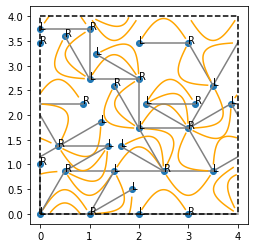

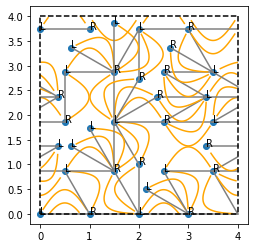

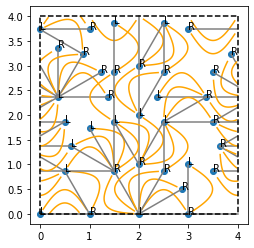

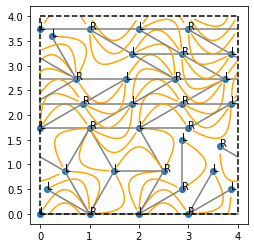

In [2]:
load_agent = QAgentReplayMemory.from_hyperparameters('../../2_by_2/01-30_degree_angles/hyperparams')
best_model = load_agent.load_model(file_name='../../2_by_2/01-30_degree_angles/model')

subgraphs = Subgraphs(angles=[0, 30, 60, 90, 120, 150, 180],
                      lengths=[1])

# create the environment
env = MetabattEnvSubgraphs(n_cells_x=5,
                           n_cells_y=5,
                           subgraphs=subgraphs)

# now use the new environment together with the pretrained agent
load_agent.env = env
load_agent.predict(model=best_model, num_episodes=500, epsilon=0, save_best_graph=True)
plt.show()
plt.hist(load_agent.rewards)

In [ ]:
best_graph = Graph.load_graph_state('best_graph')
best_graph.plot()

In [ ]:
# save model parameters
load_agent.save_hyperparameters(fname='hyperparams')
# for saving the state of the model simply do
load_agent.save_model(load_agent.policy_dqn, file_name='model')

In [ ]:
print(max(load_agent.rewards))